In [1]:
# Read in the Titanic dataset
myDF <- read.csv("/anvil/projects/tdm/data/titanic/titanic.csv")

# Look at the structure and summary
str(myDF)
summary(myDF)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [2]:
# Create vectors
my_names <- myDF$Name
my_ages  <- myDF$Age

# Combine into a single vector
my_combined <- c(my_names, my_ages)

# Check type and length
class(my_combined)   # should show "character"
length(my_combined)  # should be 1782 (891 names + 891 ages)

[1] "character"

[1] 1782

In [3]:
# Create smaller dataframe with 2 columns
my_smallDF <- data.frame(Name = my_names, Age = my_ages)

# Check the dimensions
dim(my_smallDF)   # should be 891 rows, 2 columns
str(my_smallDF)

[1] 891   2

'data.frame':	891 obs. of  2 variables:
 $ Name: chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Age : num  22 38 26 35 35 NA 54 2 27 14 ...


In [ ]:
# Vectors in R are a one-dimentional data structure that can only hold one single data type. If you try to combine different types, R will make it into the most felxible type usually being a character. Dataframes are two-dimentional and can store 2 types of data in different columns. Vectors are better for uniform lists while dataframes are better for structured datasets.

In [4]:
# Length, class, typeof, and specific entries
length(my_names)
class(my_names)
typeof(my_names)
my_names[45]

length(my_ages)
class(my_ages)
typeof(my_ages)
my_ages[45]

[1] 891

[1] "character"

[1] "character"

[1] "Devaney, Miss. Margaret Delia"

[1] 891

[1] "numeric"

[1] "double"

[1] 19

In [ ]:
# I personally would prefer to use class(). This is because it describes how R will behave with the data. It is also more relevant in data analysis 

In [5]:
# Ages under 20, excluding NA
my_selection <- my_ages[!is.na(my_ages) & my_ages < 20]

# Combine names + ages for those passengers
age_names <- paste(my_names[!is.na(my_ages) & my_ages < 20], my_selection)

# Print results
print(age_names)

  [1] "Palsson, Master. Gosta Leonard 2"                                                     
  [2] "Nasser, Mrs. Nicholas (Adele Achem) 14"                                               
  [3] "Sandstrom, Miss. Marguerite Rut 4"                                                    
  [4] "Vestrom, Miss. Hulda Amanda Adolfina 14"                                              
  [5] "Rice, Master. Eugene 2"                                                               
  [6] "McGowan, Miss. Anna \"Annie\" 15"                                                     
  [7] "Palsson, Miss. Torborg Danira 8"                                                      
  [8] "Fortune, Mr. Charles Alexander 19"                                                    
  [9] "Vander Planke, Miss. Augusta Maria 18"                                                
 [10] "Nicola-Yarred, Miss. Jamila 14"                                                       
 [11] "Laroche, Miss. Simonne Marie Anne Andree 3"          

In [7]:
# Convert passenger class (1, 2, 3) into factor with labels
myDF$Passenger_Class <- factor(
  myDF$Pclass,
  levels = c(1, 2, 3),
  labels = c("First Class", "Second Class", "Third Class")
)

# Table of Passenger_Class
table(myDF$Passenger_Class)


 First Class Second Class  Third Class 
         216          184          491 


Alive, female   Alive, male  Dead, female    Dead, male 
          233           109            81           468 

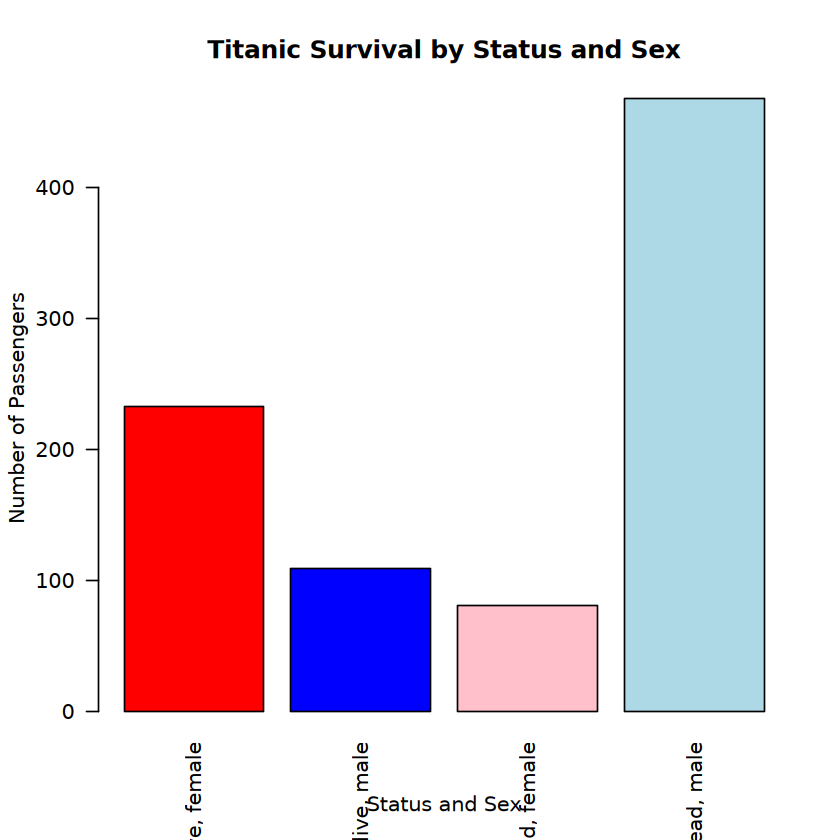

In [8]:
# Factor Survived column into Dead / Alive
myDF$Status <- factor(
  myDF$Survived,
  levels = c(0, 1),
  labels = c("Dead", "Alive")
)

# Combine Status and Sex
myDF$Combined <- paste(myDF$Status, myDF$Sex, sep = ", ")

# Check table of Combined
table(myDF$Combined)

# Barplot of Combined values
barplot(
  table(myDF$Combined),
  col = c("red", "blue", "pink", "lightblue"),  # different colors per category
  main = "Titanic Survival by Status and Sex",
  xlab = "Status and Sex",
  ylab = "Number of Passengers",
  las = 2   # rotate labels
)


In [ ]:
# I think that another column that would be helpful to have is a Status column and a passenger class column. I think this would help see the survival rate based on socioeconomic class. 

In [9]:
# Look at the range of ages (excluding NA)
range(myDF$Age, na.rm = TRUE)   # should be about 0.42 to 80

# Vector of old ages (explicit list)
old_ages <- c(61, 62, 63, 64, 65, 66, 70, 70.5, 71, 74, 80)

# Ages in dataset that match old_ages
old <- myDF$Age[!is.na(myDF$Age) & myDF$Age %in% old_ages]

# my_vec1 = ages <= 10
my_vec1 <- myDF$Age[!is.na(myDF$Age) & myDF$Age <= 10]

# my_vec2 = ages > 10 & <= 60
my_vec2 <- myDF$Age[!is.na(myDF$Age) & myDF$Age > 10 & myDF$Age <= 60]

# Combine into people
people <- c(my_vec1, my_vec2)

# Further split into groups
children <- people[people <= 20]
young    <- people[people > 20 & people <= 40]
adult    <- people[people > 40 & people <= 60]

# Check counts
table(children)
table(young)
table(adult)
table(old)


[1]  0.42 80.00

children
0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9   10   11 
   1    1    2    2    1    7   10    6   10    4    3    3    4    8    2    4 
  12   13   14 14.5   15   16   17   18   19   20 
   1    2    6    1    5   17   13   26   25   15 

young
20.5   21   22   23 23.5   24 24.5   25   26   27   28 28.5   29   30 30.5   31 
   1   24   27   15    1   30    1   23   18   18   25    2   20   25    2   17 
  32 32.5   33   34 34.5   35   36 36.5   37   38   39   40 
  18    2   15   15    1   18   22    1    6   11   14   13 

adult
40.5   41   42   43   44   45 45.5   46   47   48   49   50   51   52   53   54 
   2    6   13    5    9   12    2    3    9    9    6   10    7    6    1    8 
  55 55.5   56   57   58   59   60 
   2    1    4    2    5    2    4 

old
  61   62   63   64   65   66   70 70.5   71   74   80 
   3    4    2    2    3    1    2    1    2    1    1 

In [ ]:
# Splitting the ages into categoreis makes it easier for us to see trends and group the data. 

In [ ]:
# A more meaningful way of splitting the groups would be infants/children 0-12, teens/young adults 13-25, adults 26-55, and seniors 56+

In [12]:
myDF$AgeGroup <- NA
myDF$AgeGroup[!is.na(myDF$Age) & myDF$Age <= 20] <- "Children"
myDF$AgeGroup[!is.na(myDF$Age) & myDF$Age > 20 & myDF$Age <= 40] <- "Young"
myDF$AgeGroup[!is.na(myDF$Age) & myDF$Age > 40 & myDF$Age <= 60] <- "Adult"
myDF$AgeGroup[!is.na(myDF$Age) & myDF$Age >= 61] <- "Old"

# Table of AgeGroup and Combined
age_sex_status <- table(myDF$AgeGroup, myDF$Combined)

# View it
age_sex_status

          
           Alive, female Alive, male Dead, female Dead, male
  Adult               34          16           11         67
  Children            53          29           24         73
  Old                  3           2            0         17
  Young              107          46           29        203

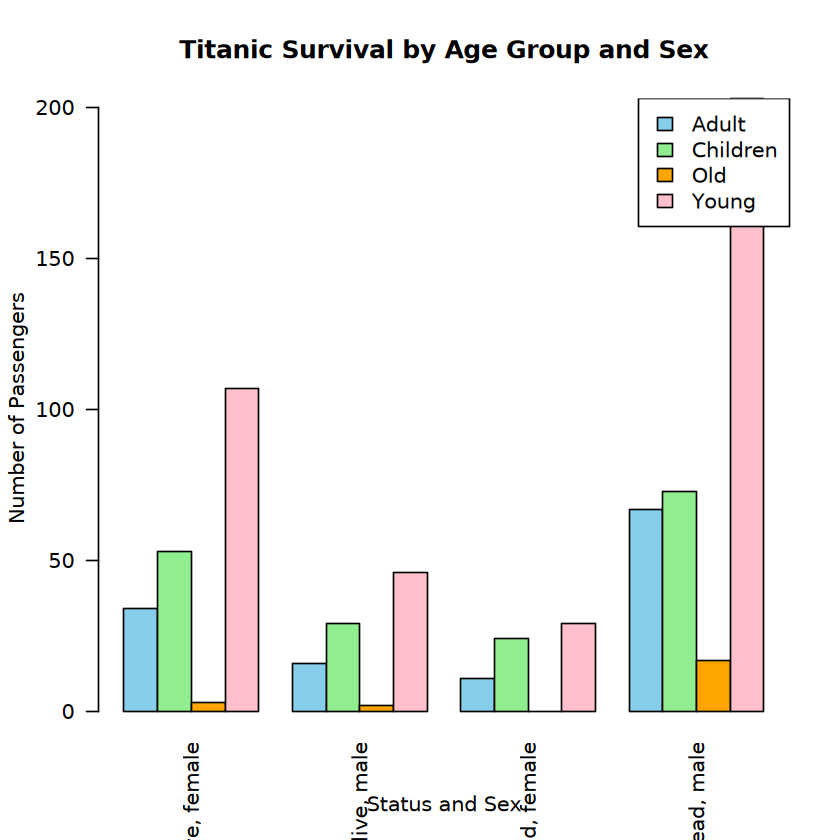

In [13]:
barplot(
  age_sex_status,
  beside = TRUE,
  col = c("skyblue", "lightgreen", "orange", "pink"),
  main = "Titanic Survival by Age Group and Sex",
  xlab = "Status and Sex",
  ylab = "Number of Passengers",
  las = 2
)

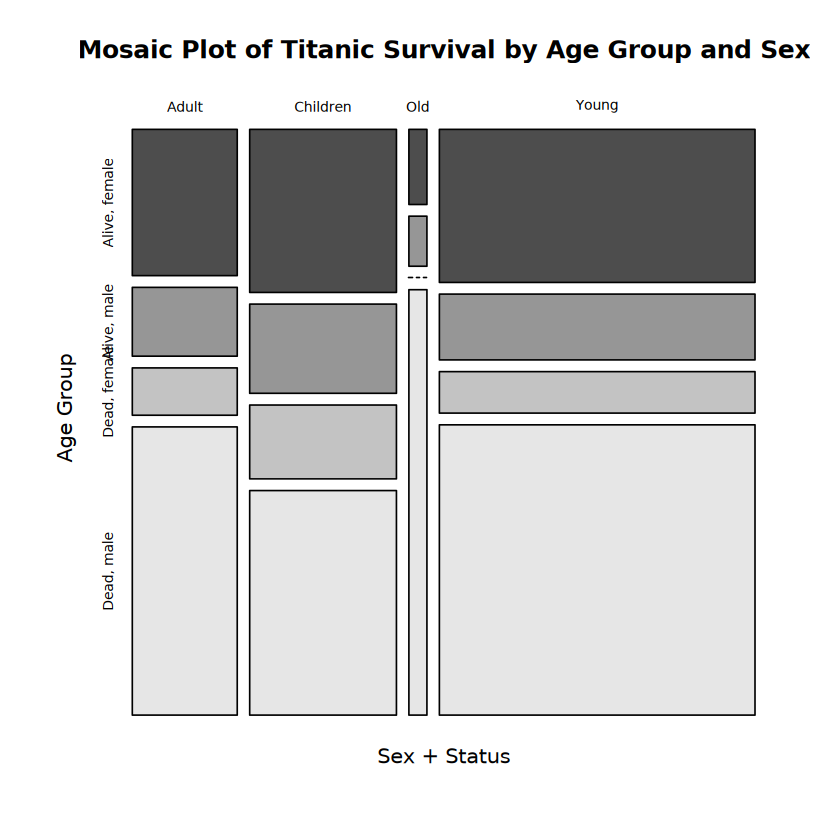

In [14]:
mosaicplot(
  age_sex_status,
  color = TRUE,
  main = "Mosaic Plot of Titanic Survival by Age Group and Sex",
  xlab = "Sex + Status",
  ylab = "Age Group"
)

In [ ]:
# Findings: Women and children had the highest survival rates, Younger men had the highest fatality rate, Very few older people lived.